# Introduction


* In the current age of data mining, there is a lot of unlabeled data available. This data are totally unstructured and maximum meaningless to naked eye. With new technologies, and the data increasing day by day, we can use clustering algorithms to cluster the data for classification. With huge size of data available totally unstructured unclassified, clustering is the best way to have first look in it.

* In this report, we will be discussing the most popular algorithms for clustering algorithms and how to implement them in python. We will discuss about the ARI, NMI and Silhouette coefficient scores for the datasets and discuss about their clustering performances in visual manner.


![](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2019/08/introduction-to-clustering.png)

# Datasets
* For this experiment, I have taken two dataset for my work. This datasets are created with pythons API sklearn.
* For dataset 1, I have used sklearn  make_moon() function. My dataset have 2000 points. In data point have two feature. The dataset is labeled and all points are randomly selected. I have added 0.09 as noise factor for the dataset 1.
* For dataset 2, I have also used sklearn make_blob() function. This dataset is also 2000 data point.All the data points are labeled. There is two cluster in the dataset and each instance has about two input feature. For the clusters standard deviation is used 3.5. All the data are created randomly.



(2000, 2)
(2000,)


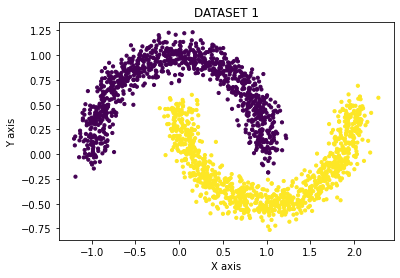

(2000, 2)
(2000,)


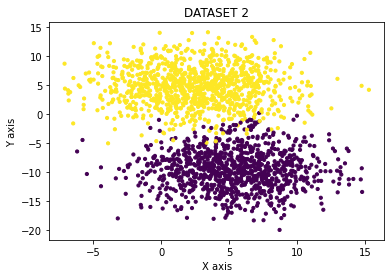

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import os
np.random.seed(10)

from sklearn import cluster, datasets, mixture
X1,Y1 = datasets.make_moons(n_samples=2000, noise=.09,random_state=10)
#plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='r')
print(X1.shape)
print(Y1.shape)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=Y1)
plt.title('DATASET 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
#plt.savefig('Dataset1')

plt.show()


from sklearn.datasets import make_blobs
X3,Y3  = make_blobs(n_samples=2000,cluster_std=3.5,centers=2, n_features=2,random_state=10)
print(X3.shape)
print(Y3.shape)
plt.title('DATASET 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=Y3)
#plt.savefig('Dataset2')
plt.show()

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering


# Comparative Analysis of Clustering Algorithms:
* In the dataset1 and dataset2, I have applied the following clustering algorithms:
1. KMEANS
2. KMEDIOD
3. BIRCH
4. AGNES
5. DBSCAN

* All the hyper parameters are tuned to maximum efficiency by random search and repeatedly tested with the datasets. Now I will discuss each algorithm I have used and show it’s cluster visualization with ARI, NMI and Silhouette coefficient.


* Now i will build the alogrithms that are available in Sk learn here:


In [3]:

#Model Build dataset1
kmeansmodel = KMeans(n_clusters= 2, init='k-means++',max_iter=1000,random_state=10)
y_kmeans= kmeansmodel.fit_predict(X1)

birchmodel=Birch(n_clusters=2,threshold=0.5,branching_factor=100)
y_birch=birchmodel.fit_predict(X1)
print(y_birch.shape)

agnesmodel = AgglomerativeClustering(n_clusters=2)
y_agnes=birchmodel.fit_predict(X1)
print(y_agnes.shape)



#Model Build dataset 2
kmeansmodel2 = KMeans(n_clusters= 2, init='k-means++',max_iter=1000,random_state=10)
y_kmeans2= kmeansmodel2.fit_predict(X3)

birchmodel2=Birch(n_clusters=2,threshold=0.1,branching_factor=100)
y_birch2=birchmodel2.fit_predict(X3)
print(y_birch2.shape)

agnesmodel2 = AgglomerativeClustering(n_clusters=2)
y_agnes2=agnesmodel2.fit_predict(X3)
print(y_agnes2.shape)


(2000,)
(2000,)
(2000,)
(2000,)


In [4]:
#print(y_kmeans)

# 1. KMEANS:
** Kmeans clustering Algorithm is based on partion. I applied kmeans clustering from the python sklearn library. But I have tuned the hyper parameters.

Scores of ARI, NMI and Silhouette coefficient for dataset1 and dataset 2:

| Scoring Method | Dataset1 | Dataset 2 |
| --- | --- | --- |
| ARI | 0.2476 | 0.9234 |
| NMI | 0.1871 | 0.8613 |
| Silhouette Coefficient | 0.48667 | 0.590 |

                                         Table 1: ARI , NMI, Silhouette Coefficient values for dataset1 and dataset2

As the scoring and the visualization indicates, kmeans clustering worked well in the dataset2. Kmeans need convex shaped dataset to work better. It works better on the convex shapes dataset. That is the major drawback of the kmeans clustering. As our dataset is non convex in dataset1 and kind of convex in dataset2, the kmeans performs well in the dataset2. It is the expected result.

Though kmeans suffers when there is noise, that&#39;s the reason for not achieving state of the art score in our dataset 2. We would have got score close to 1 in ARI in dataset2 if we have less noise in dataset2.

Kmeans can&#39;t work to find the outliers.As we can see there is no outlier detected in our datasets.


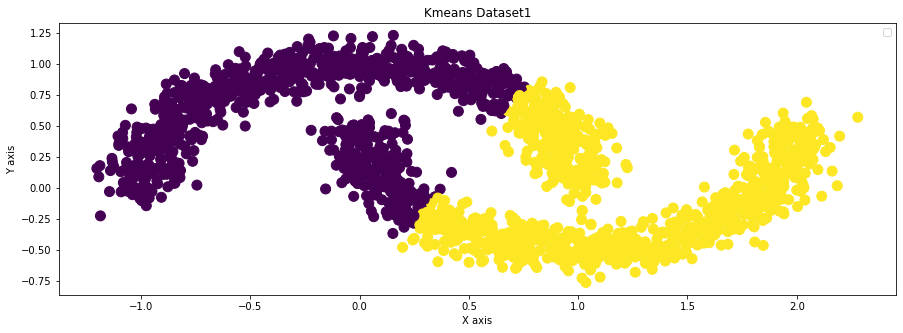

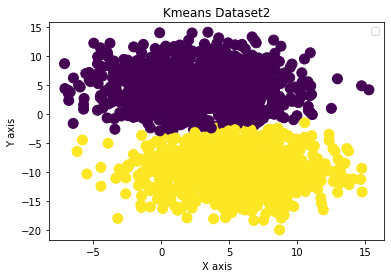

In [5]:
plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_kmeans)
plt.title('Kmeans Dataset1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
#plt.savefig('Kmeansd1',dpi=300)
plt.show()

#plt.subplot(1,2,2)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_kmeans2)
plt.title('Kmeans Dataset2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
#plt.savefig('Kmeansd1d2',dpi=300)
plt.show()

# 2. KMEDIOD:
For kmediod, I have implemented in from scratch. It is also a partition based clustering algorithm. I have tuned the hyper parameters with random search.

                       Scores of ARI, NMI and Silhouette coefficient for dataset1 and dataset 2:

| Scoring Method | Dataset1 | Dataset2 |
| --- | --- | --- |
| ARI | 0.3302 | 0.9254 |
| NMI | 0.2540 | 0.8642 |
| Silhouette Coefficient | 0.4863 | 0.5907 |

                       Table 2: ARI , NMI, Silhouette Coefficient values for dataset1 and dataset2

As the visualization and scoring values indicate, kmediod performs well on the convex shaped dataset better than the non convex ones. In our datasets, kmediod works as like as kmeans clustering. It is basically the same algorithm as kmeans but the distance calculation is different. I used Eucleadean distance measurement method.

But in the matter of time complexity, kmediod takes a longer time than kmeans. It is a costly algorithm.

As kmediod is built on PAM,it is not suitable for clustering non-spherical (arbitrary shaped) groups of objects like kmeans.

It also cannot detect any outlier in the datasets.And we have to declare the cluster numbers before running the algorithm.

So the result we can see is expected characteristics of kmediod algorithm.

In [6]:
## K mediod Implementation
def euclideanDistance(x, y):
    '''
    Euclidean distance between x, y
    --------
    Return
    d: float
    '''
    squared_d = 0
    for i in range(len(x)):
        squared_d += (x[i] - y[i])**2
    d = np.sqrt(squared_d)
    return d

def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    #X2 = X[label == 2, :]
    
    #you can fix this dpi 
    #plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^')
    plt.plot(X1[:, 0], X1[:, 1], 'go')
    #plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    #plt.axis('equal')
    #plt.plot()
    #plt.show()
    
#visualize(X, original_label)
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.medoids = []
        
        #Starting medoids will be random members from data set X
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)
        
    def isConverged(self, new_medoids):
        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
        
    def updateMedoids(self, X, labels):
        self.has_converged = True
        
        #Store data points to the current cluster they belong to
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        
        #Calculate the new medoids
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                #Cost of the current data points to be compared with the current optimal cost
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #Now we have the optimal medoid of the current cluster
            new_medoids.append(new_medoid)
        
        #If not converged yet, accept the new medoids
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def fit(self, X):
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            #Labels for this iteration
            cur_labels = []
            for medoid in range(0,self.k):
                #Dissimilarity cost of the current cluster
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    #Distances from a data point to each of the medoids
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclideanDistance(self.medoids[j], X[k]))
                    #Data points' label is the medoid which has minimal distance to it
                    cur_labels.append(d_list.index(min(d_list)))
                    
                    self.medoids_cost[medoid] += min(d_list)
                                
            self.updateMedoids(X, cur_labels)
            
            if self.has_converged:
                break

        return np.array(self.medoids)

        
    def predict(self,data):
        pred = []
        for i in range(len(data)):
            #Distances from a data point to each of the medoids
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclideanDistance(self.medoids[j],data[i]))
                
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)



Centers found by your model(dataset1):
[[ 1.20475859 -0.29217956]
 [-0.10081813  0.74712954]]
Centers found by your model(dataset2):
[[ 2.70642823  4.71302922]
 [ 5.36026528 -9.35928725]]


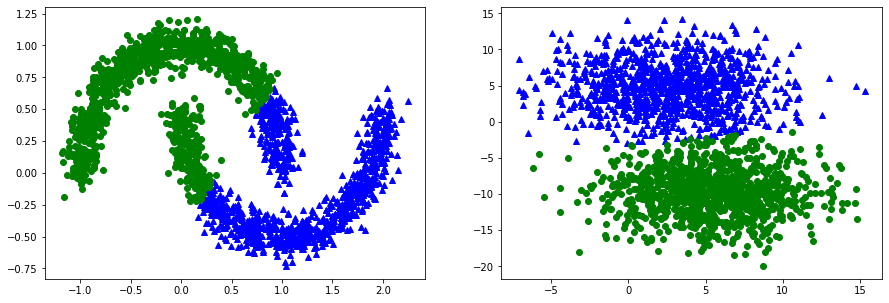

In [7]:
point,lb = datasets.make_moons(n_samples=2000, noise=.08,random_state=10)
model=k_medoids(k=2)
print('Centers found by your model(dataset1):')
print(model.fit(point))
plt.figure(figsize=(15,5))

pred = model.predict(point)
plt.subplot(1, 2, 1)
visualize(point,pred)


from sklearn.datasets import make_blobs
point1,lb1  = make_blobs(n_samples=2000,cluster_std=3.5, centers=2, n_features=2,random_state=10)
model=k_medoids(k=2)
print('Centers found by your model(dataset2):')
print(model.fit(point1))

pred1 = model.predict(point1)
plt.subplot(1, 2, 2)
visualize(point1,pred1)

#plt.savefig('Kmediodd1d2',dpi=300)

#plt.show()

#print(pred)

# 3. AGNES
For agnes, I have used sklearn API. It is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. I have tuned the hyper parameters with random search. It works in a &quot;Bottom Up&quot; manner.

                      Scores of ARI, NMI and Silhouette coefficient for dataset1 and dataset 2:

| Scoring Method | Dataset1 | Dataset2 |
| --- | --- | --- |
| ARI | 0.3767 | 0.9081 |
| NMI | 0.3413 | 0.8427 |
| Silhouette Coefficient | 0.4583 | 0.5878 |

                      Table 3: ARI , NMI, Silhouette Coefficient values for dataset1 and dataset2

As we can see from the visualization and table, the Agnes performs less better than the partition clustering in kmeans and kmediod.

Specially in the dataset1,where the data is non convex, agnes fails to detect the right clusters. In dataset2, agnes performs well

Agnes can&#39;t undo the previous steps, so if the connection is not good then it gives bad result.

Agnes is very slow, with a large dataset it works very poor

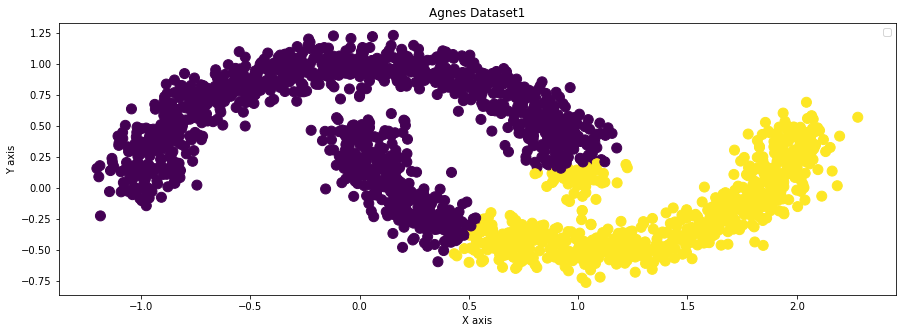

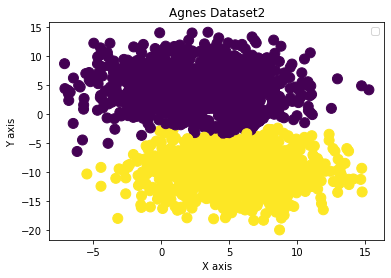

In [8]:
plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_agnes)
plt.title('Agnes Dataset1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
#plt.savefig('Kmeansd1',dpi=300)
plt.show()

#plt.subplot(1,2,2)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_agnes2)
plt.title('Agnes Dataset2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
#plt.savefig('Kmeansd1d2',dpi=300)
plt.show()

# 4.BIRCH

Birch stands for Balanced Iterative Reducing and Clustering. Regular clustering algorithms do not scale well in terms of running time and quality as the size of the dataset increases. This is where BIRCH clustering comes in. I have tuned the hyper parameters as threshold, branching factor and number of clusters for best result.

                            Scores of ARI, NMI and Silhouette coefficient for dataset1 and dataset 2:

| Scoring Method | Dataset1 | Dataset2 |
| --- | --- | --- |
| ARI | 0.3767 | 0.8722 |
| NMI | 0.3413 | 0.8102 |
| Silhouette Coefficient | 0.4583 | 0.5760 |

                           Table 4: ARI , NMI, Silhouette Coefficient values for dataset1 and dataset2

As we can see from the visualization and the table of scoring, it is prevalent that Birch works like AGNES. Both of them are hierarchical clustering.

In my dataset 1 and dataset 2 BIRCH performs as like as agnes.

It is also very time consuming like Agnes.


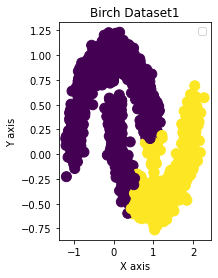

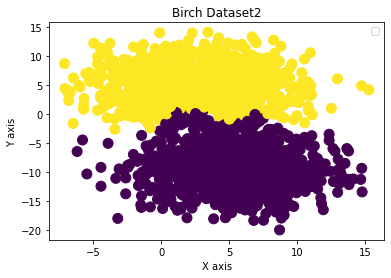

In [9]:
#plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_birch)
plt.title('Birch Dataset1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
#plt.savefig('Kmeansd1',dpi=300)
plt.show()

#plt.subplot(1,2,2)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_birch2)
plt.title('Birch Dataset2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
#plt.savefig('birchd1d2',dpi=300)
plt.show()

# 5.DBSCAN
DBSCAN means Density-based spatial clustering of applications with noise (DBSCAN).DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.
                       
                       Scores of ARI, NMI and Silhouette coefficient for dataset1 and dataset 2:

| Scoring Method | Dataset1 | Dataset2 |
| --- | --- | --- |
| ARI | 0.99201 | -0.0001 |
| NMI | 0.9787 | 0.0022 |
| Silhouette Coefficient | 0.3010 | -0.16260 |

                     Table 5: ARI , NMI, Silhouette Coefficient values for dataset1 and dataset2

As we can see from the visualization and the scoring values from the table,we can say that DBSCAN performed well on dataset1 and very bad on dataset.

It is because in the border region of the dataset and its density. In dataset 2 the border regions are very dense so DBSCAN fails to find the clusters but in dataset1,the border region have less noise and difference of density is prominent. That&#39;s why DBSCAN works well in dataset2.

DBSCAN is very sensitive to it&#39;s hyperparameters. I had to do very fine tuing on epsilon. With slight wrong values, DBSCAN performs very poorly.

But this algorithm can detect outliers and it doesn&#39;t require any kind of cluster number to calculate.

In [10]:
def MyDBSCAN(D, eps, MinPts):  
    labels = [0]*len(D)
    C = 0
    for P in range(0, len(D)):
        if not (labels[P] == 0):
           continue
        NeighborPts = regionQuery(D, P, eps)
        if len(NeighborPts) < MinPts:
            labels[P] = -1    
        else: 
           C += 1
           growCluster(D, labels, P, NeighborPts, C, eps, MinPts)

    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):    
        Pn = NeighborPts[i]
        if labels[Pn] == -1:
           labels[Pn] = C
        elif labels[Pn] == 0:
            labels[Pn] = C
            PnNeighborPts = regionQuery(D, Pn, eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
        i += 1        


def regionQuery(D, P, eps):

    neighbors = []
    
    for Pn in range(0, len(D)):
        
        if np.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors



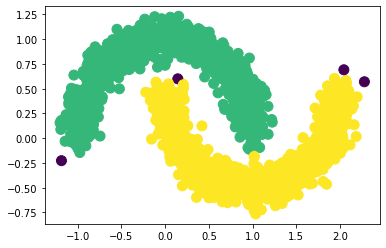

In [11]:

dbscan_labels1=MyDBSCAN(X1, .2, 70)
#plt.figure(figsize=(10,8))
#plt.subplot(1, 2, 5)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=dbscan_labels1)
plt.show()
inti_point = np.random.randint(0, len(X1)-1, 2 )
medoids=X1[inti_point]


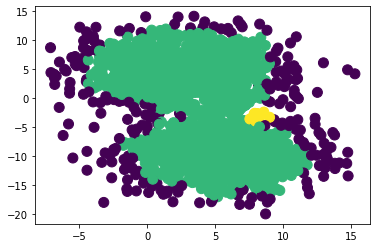

In [12]:
dbscan_labels2=MyDBSCAN(X3,1,10)
#plt.figure(figsize=(10,8))
#plt.subplot(1, 2, 5)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=dbscan_labels2)
plt.show()
inti_point = np.random.randint(0, len(X3)-1, 2 )
medoids=X3[inti_point]

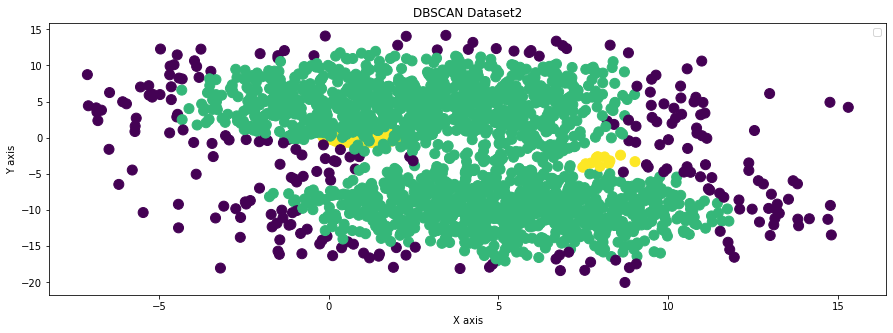

In [13]:
plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=dbscan_labels1)
plt.title('DBSCAN Dataset1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
#plt.savefig('Kmeansd1',dpi=300)
#plt.show()

#plt.subplot(1,2,2)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=dbscan_labels2)
plt.title('DBSCAN Dataset2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
#plt.savefig('dbscand1d2',dpi=300)
plt.show()

# All Result Compilation & Discussion:


| **Scoring Method** | **Algorithm** | **Dataset1** | **Dataset2** |
| --- | --- | --- | --- |
| ARI | kmeans | 0.2476 | 0.9234 |
| NMI | kmeans | 0.18714 | 0.8613 |
| Silhouette Coefficient | kmeans | 0.48667 | 0.5907 |
| ARI | kmediod | 0.3302 | 0.9254 |
| NMI | kmediod | 0.2540 | 0.8642 |
| Silhouette Coefficient | kmediod | 0.4863 | 0.5907 |
| ARI | AGNES | 0.3767 | 0.9081 |
| NMI | AGNES | 0.3413 | 0.8427 |
| Silhouette Coefficient | AGNES | 0.4583 | 0.5878 |
| ARI | Birch | 0.3767 | 0.8722 |
| NMI | Birch | 0.3413 | 0.8102 |
| Silhouette Coefficient | Birch | 0.4583 | 0.5760 |
| ARI | DBSCAN | 0.9920 | -0.0001 |
| NMI | DBSCAN | 0.9787 | 0.0022 |
| Silhouette Coefficient | DBSCAN | 0.3010 | -0.1626 |

                     Table 6: ARI , NMI, Silhouette Coefficient values for dataset1 and dataset2 on all algorithms.

According to all the visualizations and the score from the NMI, ARI, Silhouette coefficient, we have seen that from dataset to dataset different clustering algorithm works differently. Some algorithms work better in one dataset and performs bad in other. So we need to know the dataset before applying algorithms.

From our result we can see that in our dataset1 which is non convex shaped points, another dataset2 is convex shaped.

For partition based algorithms like kmeans, kmediod works good with respect to any dataset.but they works better with convex shaped clustered datasets.They are computationaly cheaper than others.

For hierarchical clustering like AGNES ,BIRCH ,we can see that they are very costly to computational cost. Don&#39;t to better in the case of huge datasets. It&#39;s only advantage is easy to implement. It performs good but it is not better than partition based clustering.

For density based clustering ,DBSCAN works well with data set separated data clusters with different density in the dataset. Density based DBSCAN is very sensitive to hyper paramemeter. With dataset2 we can see it performs very bad as it is very noisy data and density difference is very equivalent. But in dataset1 we can see that with different density of clusters, it works well.

In [14]:
#ARI
#NMI
#Silhouette Coefficient
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score



ari_kmeans=adjusted_rand_score(Y1,y_kmeans)
ari_kmediod=adjusted_rand_score(lb,pred)
ari_birch=adjusted_rand_score(Y1,y_birch)
ari_dbscan=adjusted_rand_score(Y1,dbscan_labels1)
ari_agnes=adjusted_rand_score(Y1,y_agnes)

print("DATASET1:")
print("ARI of Kmeans: "+ str(ari_kmeans))
print("ARI of Kmediod: "+ str(ari_kmediod))
print("ARI of Birch :"+ str(ari_birch))
print("ARI of Dbscan: "+ str(ari_dbscan))
print("ARI of Agnes: "+ str(ari_agnes))


ari_kmeans=adjusted_rand_score(Y3,y_kmeans2)
ari_kmediod=adjusted_rand_score(lb1,pred1)
ari_birch=adjusted_rand_score(Y3,y_birch2)
ari_dbscan=adjusted_rand_score(Y3,dbscan_labels2)
ari_agnes=adjusted_rand_score(Y3,y_agnes2)

print("DATASET2:")
print("ARI of Kmeans: "+ str(ari_kmeans))
print("ARI of Kmediod: "+ str(ari_kmediod))
print("ARI of Birch :"+ str(ari_birch))
print("ARI of Dbscan: "+ str(ari_dbscan))
print("ARI of Agnes: "+ str(ari_agnes))




nmi_kmeans=normalized_mutual_info_score(Y1,y_kmeans)
nmi_kmediod=normalized_mutual_info_score(lb,pred)
nmi_birch=normalized_mutual_info_score(Y1,y_birch)
nmi_dbscan=normalized_mutual_info_score(Y1,dbscan_labels1)
nmi_agnes=normalized_mutual_info_score(Y1,y_agnes)
print("DATASET1:")
print("NMI of Kmeans: "+ str(nmi_kmeans))
print("NMI of Kmediod: "+ str(nmi_kmediod))
print("NMI of Birch :"+ str(nmi_birch))
print("NMI of Dbscan: "+ str(nmi_dbscan))
print("NMI of Agnes: "+ str(nmi_agnes))


nmi_kmeans=normalized_mutual_info_score(Y3,y_kmeans2)
nmi_kmediod=normalized_mutual_info_score(lb1,pred1)
nmi_birch=normalized_mutual_info_score(Y3,y_birch2)
nmi_dbscan=normalized_mutual_info_score(Y3,dbscan_labels2)
nmi_agnes=normalized_mutual_info_score(Y3,y_agnes2)
print("DATASET2:")
print("NMI of Kmeans: "+ str(nmi_kmeans))
print("NMI of Kmediod: "+ str(nmi_kmediod))
print("NMI of Birch :"+ str(nmi_birch))
print("NMI of Dbscan: "+ str(nmi_dbscan))
print("NMI of Agnes: "+ str(nmi_agnes))





sil_kmeans=silhouette_score(X1,y_kmeans)
sil_kmediod=silhouette_score(point,pred)
sil_birch=silhouette_score(X1,y_birch)
sil_dbscan=silhouette_score(X1,dbscan_labels1)
sil_agnes=silhouette_score(X1,y_agnes)

print("Dataset1:")
print("Silhouette Coefficient with Kmeans: "+ str(sil_kmeans))
print("Silhouette Coefficient with Kmediod: "+ str(sil_kmediod))
print("Silhouette Coefficient with Birch :"+ str(sil_birch))
print("Silhouette Coefficient with Dbscan : "+ str(sil_dbscan))
print("Silhouette Coefficient with Agnes : "+ str(sil_agnes))

print("Dataset2:")
sil_kmeans=silhouette_score(X3,y_kmeans2)
sil_kmediod=silhouette_score(point1,pred1)
sil_birch=silhouette_score(X3,y_birch2)
sil_dbscan=silhouette_score(X3,dbscan_labels2)
sil_agnes=silhouette_score(X3,y_agnes2)

print("Silhouette Coefficient with Kmeans: "+ str(sil_kmeans))
print("Silhouette Coefficient with Kmediod: "+ str(sil_kmediod))
print("Silhouette Coefficient with Birch :"+ str(sil_birch))
print("Silhouette Coefficient with Dbscan : "+ str(sil_dbscan))
print("Silhouette Coefficient with Agnes : "+ str(sil_agnes))





DATASET1:
ARI of Kmeans: 0.24762763165062956
ARI of Kmediod: 0.33029022183104517
ARI of Birch :0.3767076067566142
ARI of Dbscan: 0.9920149895714532
ARI of Agnes: 0.3767076067566142
DATASET2:
ARI of Kmeans: 0.9234827222605192
ARI of Kmediod: 0.9254066848340207
ARI of Birch :0.872292314560211
ARI of Dbscan: -0.00016436623002222448
ARI of Agnes: 0.90816307882887
DATASET1:
NMI of Kmeans: 0.18714564323074934
NMI of Kmediod: 0.2540926163780444
NMI of Birch :0.341366173543779
NMI of Dbscan: 0.9787649300611727
NMI of Agnes: 0.341366173543779
DATASET2:
NMI of Kmeans: 0.8613851116177159
NMI of Kmediod: 0.8642486670956319
NMI of Birch :0.8102453395167878
NMI of Dbscan: 0.0022364550336834766
NMI of Agnes: 0.8427393441408568
Dataset1:
Silhouette Coefficient with Kmeans: 0.4866796616364301
Silhouette Coefficient with Kmediod: 0.4863759332744959
Silhouette Coefficient with Birch :0.45835031870569487
Silhouette Coefficient with Dbscan : 0.3010813290557993
Silhouette Coefficient with Agnes : 0.45835031

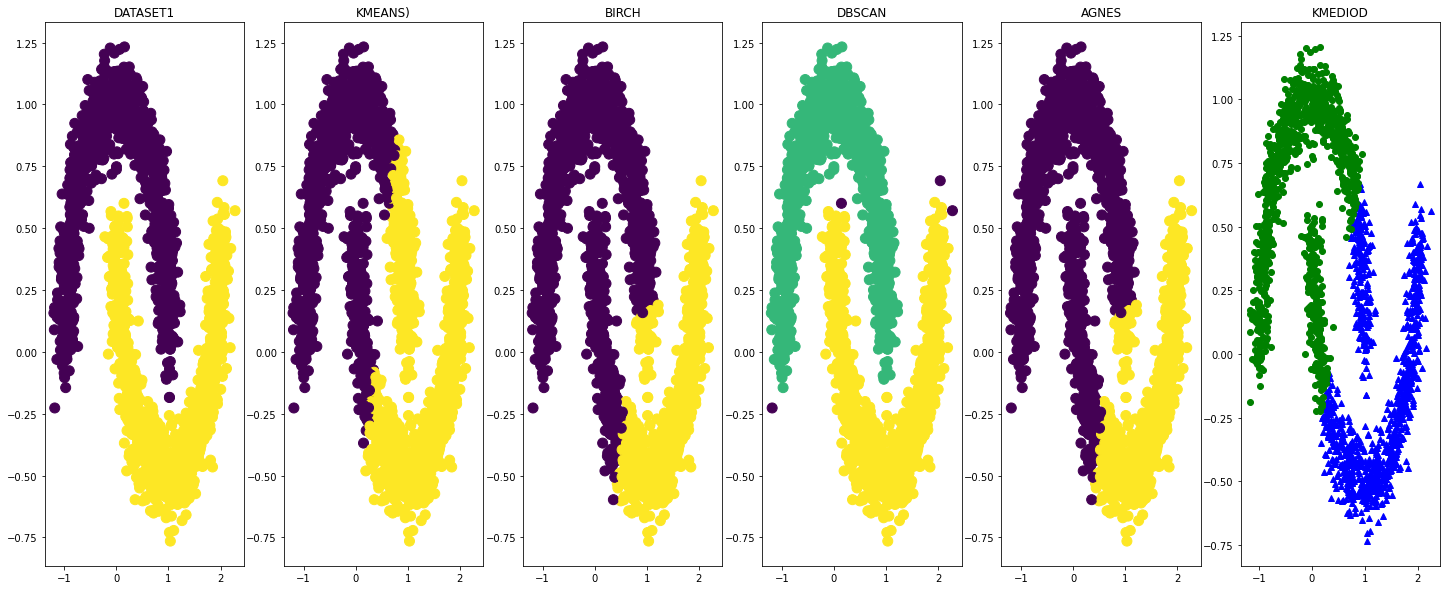

In [15]:
plt.figure(figsize=(25,10))

plt.subplot(1,6,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100,c=Y1)
plt.title('DATASET1')

plt.subplot(1,6,2)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_kmeans)
plt.title('KMEANS)')



#Visualizing all the clusters of birch
plt.subplot(1,6,3)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_birch)
plt.title('BIRCH')


plt.subplot(1,6,4)
plt.title('DBSCAN')
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=dbscan_labels1)

plt.subplot(1,6,5)
plt.title("AGNES")
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_agnes)

plt.subplot(1,6,6)
plt.title('KMEDIOD')
visualize(point,pred)

plt.savefig('alld1',dpi=300)

plt.show()


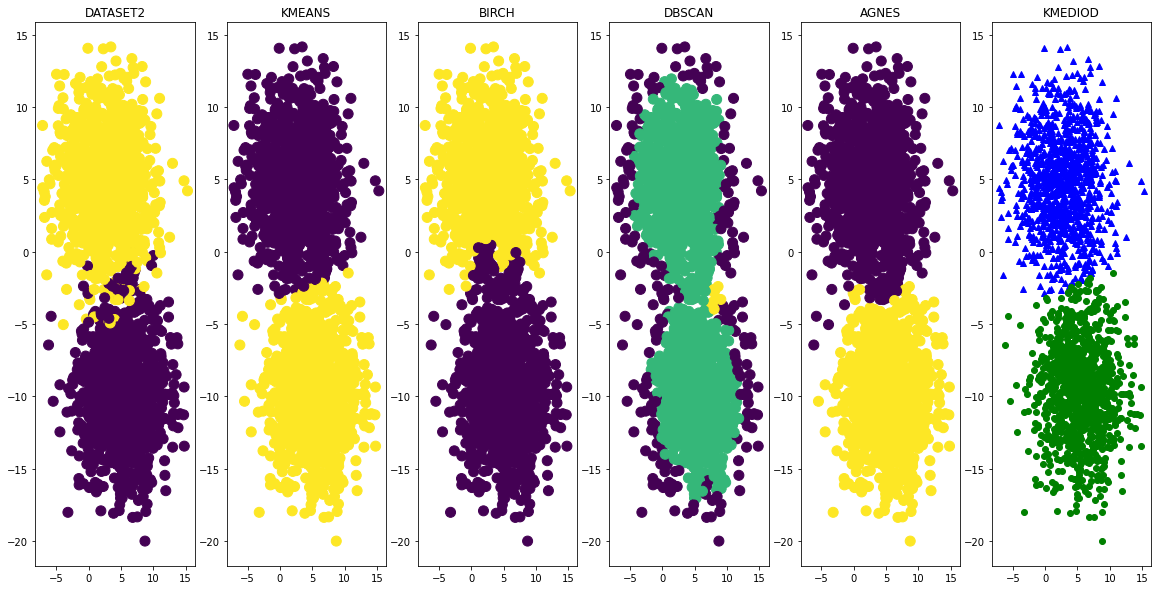

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,6,1)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=Y3)
plt.title('DATASET2')

plt.subplot(1,6,2)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_kmeans2)
#plt.show()
plt.title("KMEANS")

plt.subplot(1,6,3)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_birch2)
plt.title("BIRCH")

plt.subplot(1,6,4)
plt.title("DBSCAN")
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=dbscan_labels2)

plt.subplot(1,6,5)
plt.title("AGNES")
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_agnes2)

plt.subplot(1,6,6)
plt.title('KMEDIOD')
visualize(point1,pred1)

plt.savefig('alld2',dpi=300)
plt.show()


# Conclusion: 
So we can say from the analysis, different dataset works differently with clustering algorithms. With the nature of dataset, we should choose algorithm for clustering. There are many different clustering algorithms, and no single best method for all datasets.


# References :

T. Kanungo, D. M. Mount, N. S. Netanyahu, C. D. Piatko, R. Silverman and A. Y. Wu, "An efficient k-means clustering algorithm: analysis and implementation," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 24, no. 7, pp. 881-892, July 2002, doi: 10.1109/TPAMI.2002.1017616.

Danyang Cao and Bingru Yang, "An improved k-medoids clustering algorithm," 2010 The 2nd International Conference on Computer and Automation Engineering (ICCAE), Singapore, 2010, pp. 132-135, doi: 10.1109/ICCAE.2010.5452085.

G. H. Shah, "An improved DBSCAN, a density based clustering algorithm with parameter selection for high dimensional data sets," 2012 Nirma University International Conference on Engineering (NUiCONE), Ahmedabad, India, 2012, pp. 1-6, doi: 10.1109/NUICONE.2012.6493211.